# **Sentiment Analysis of YouTube Video Comments on the Indian Education System**



In [209]:
!pip install transformers
!pip install huggingface_hub

In [210]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [211]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [212]:
comments = pd.read_csv("/content/comments-dataset.csv")
comments.head()

,publishedTimeText,simpleText,votes,author,isReply,isHearted,isPinned,isPaid,paidAmount,isSponsor,sponsorshipMonths
0,1 year ago,Things our education system lacks as of now~ 1...,2217,@MaybeSomeone7483,False,True,False,False,NaN,False,NaN
1,1 year ago,kapil sharma show??,49,@cs372,True,False,False,False,NaN,False,NaN
2,1 year ago,Veryyy funny,21,@Schrodinger-c7g,True,False,False,False,NaN,False,NaN
3,1 year ago,WhatsApp University?,48,@riyaz4880,True,False,False,False,NaN,False,NaN
4,1 year ago,Same in Bangladesh,11,@jahidhosssin54456,True,False,False,False,NaN,False,NaN


In [213]:
comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1873 entries, 0 to 1872
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   publishedTimeText  1873 non-null   object 
 1   simpleText         1873 non-null   object 
 2   votes              1873 non-null   int64  
 3   author             1873 non-null   object 
 4   isReply            1873 non-null   bool   
 5   isHearted          1873 non-null   bool   
 6   isPinned           1873 non-null   bool   
 7   isPaid             1873 non-null   bool   
 8   paidAmount         0 non-null      float64
 9   isSponsor          1873 non-null   bool   
 10  sponsorshipMonths  0 non-null      float64
dtypes: bool(5), float64(2), int64(1), object(3)
memory usage: 97.1+ KB


In [214]:
comments.shape

(1873, 11)

## **Initial Data Cleaning**

In [215]:
# Remove unnecessary columns
columns_to_drop = ["publishedTimeText", "author", "isHearted", "isPinned", "isPaid", "paidAmount", "isSponsor", "sponsorshipMonths"]
comments.drop(columns=columns_to_drop, inplace=True)

In [216]:
comments.head()

,simpleText,votes,isReply
0,Things our education system lacks as of now~ 1...,2217,False
1,kapil sharma show??,49,True
2,Veryyy funny,21,True
3,WhatsApp University?,48,True
4,Same in Bangladesh,11,True


In [217]:
# Remove duplicate records based on the "simpleText" column, keeping the first occurrence
comments = comments.drop_duplicates(subset="simpleText", keep="first")
comments

,simpleText,votes,isReply
0,Things our education system lacks as of now~ 1...,2217,False
1,kapil sharma show??,49,True
2,Veryyy funny,21,True
3,WhatsApp University?,48,True
4,Same in Bangladesh,11,True
...,...,...,...
1868,Hi it's not died due to its commited cause it'...,0,False
1869,"Kya bhaiya, bina IIT ke me proper AI or ML nhi...",0,False
1870,Remove minimum age limit for exams.... SSLC......,0,False
1871,Dark reality is School system Assignment cop...,0,False


## **Data Exploration and Cleaning**

In [218]:
reply_counts = comments["isReply"].value_counts()
reply_counts

,count
isReply,
False,1198
True,598


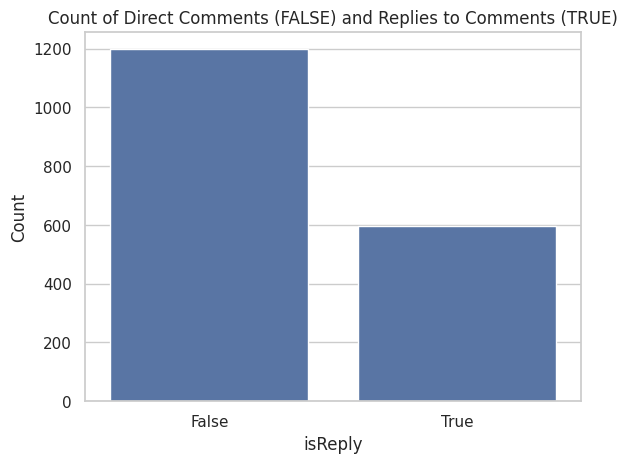

In [219]:
# Count of Comments (FALSE) and Replies to comments (TRUE)
sns.countplot(x="isReply", data=comments)
plt.title("Count of Direct Comments (FALSE) and Replies to Comments (TRUE)")
plt.xlabel("isReply")
plt.ylabel("Count")
plt.show()

In [220]:
comments = comments[comments["isReply"] == False]

In [221]:
reply_counts = comments["isReply"].value_counts()
reply_counts

,count
isReply,
False,1198


In [222]:
comments = comments.drop(columns=["isReply"])

In [223]:
# Reset index
comments.reset_index(drop=True, inplace=True)

In [224]:
comments.head(10)

,simpleText,votes
0,Things our education system lacks as of now~ 1...,2217
1,Everything about our education system is dark☕️,2002
2,As I always say - If you are going through hel...,1385
3,"I think we, as students, should start a campai...",542
4,During my IIT JEE prep even though my parents ...,405
5,I guess it's good time to share my experiences...,246
6,The reasons mentioned are not only for student...,232
7,Indian students lack two things- 1) Equality 2...,212
8,"Really,You are going to next best teacher of I...",185
9,Aspirants! Please don't make stupid decisions....,170


In [225]:
# Keep only education related comments
education_keywords = [
    "education", "school", "university", "learn", "teacher", "student", "course", "tutorial", "lesson", "study", "homework",
    "exam", "test", "assignment", "academic", "grade", "degree", "college", "institute", "coach", "system", "teach",
    "train", "lecture", "curriculum", "syllabus", "mentor", "tutor", "workshop", "seminar", "resources", "class",
    "growth", "development", "skill", "knowledge", "pedagogy", "enrichment", "evaluation", "accreditation"
]


def is_related_to_education(text):
    for keyword in education_keywords:
        if keyword in text.lower():
            return True
    return False

comments["isEducationRelated"] = comments["simpleText"].apply(is_related_to_education)

comments

,simpleText,votes,isEducationRelated
0,Things our education system lacks as of now~ 1...,2217,True
1,Everything about our education system is dark☕️,2002,True
2,As I always say - If you are going through hel...,1385,False
3,"I think we, as students, should start a campai...",542,True
4,During my IIT JEE prep even though my parents ...,405,True
...,...,...,...
1193,Hi it's not died due to its commited cause it'...,0,False
1194,"Kya bhaiya, bina IIT ke me proper AI or ML nhi...",0,True
1195,Remove minimum age limit for exams.... SSLC......,0,True
1196,Dark reality is School system Assignment cop...,0,True


In [226]:
comments = comments[comments["isEducationRelated"]]
comments

,simpleText,votes,isEducationRelated
0,Things our education system lacks as of now~ 1...,2217,True
1,Everything about our education system is dark☕️,2002,True
3,"I think we, as students, should start a campai...",542,True
4,During my IIT JEE prep even though my parents ...,405,True
5,I guess it's good time to share my experiences...,246,True
...,...,...,...
1184,"WAIT WAIT WAIT, IN 6TH GRADE YOU HAVE CLASSES ...",0,True
1192,teacher name?,0,True
1194,"Kya bhaiya, bina IIT ke me proper AI or ML nhi...",0,True
1195,Remove minimum age limit for exams.... SSLC......,0,True


In [227]:
education_related_counts = comments["isEducationRelated"].value_counts()
education_related_counts

,count
isEducationRelated,
True,436


In [228]:
comments = comments.drop(columns=["isEducationRelated"])
# Reset index
comments.reset_index(drop=True, inplace=True)

In [229]:
comments = comments.sort_values(by="votes", ascending=False)
comments

,simpleText,votes
0,Things our education system lacks as of now~ 1...,2217
1,Everything about our education system is dark☕️,2002
2,"I think we, as students, should start a campai...",542
3,During my IIT JEE prep even though my parents ...,405
4,I guess it's good time to share my experiences...,246
...,...,...
286,Gurukul system was far better,0
287,I am in kota ..in 2022 almost 15 students died...,0
288,If you have courage then make a video on saddn...,0
289,Plz make a video on improvement exam as I want...,0


## **Sentiment Analysis**

In [230]:
from transformers import pipeline, logging
from google.colab import userdata
import os

os.environ["HUGGINGFACEHUB_API_TOKEN"] = userdata.get('HF_TOKEN')

In [231]:
# Suppressing warnings or informational messages
logging.set_verbosity_error()

In [232]:
sentiment_pipeline = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

In [233]:
# Apply sentiment analysis
def get_sentiment(text):
    truncated_text = text[:512]
    result = sentiment_pipeline(truncated_text)[0]
    return result["label"], result["score"]


### Evaluating Models

In [234]:
# Selecting few comments for evaluation
comments_top_voted = comments.head(10)
comments_top_voted

,simpleText,votes
0,Things our education system lacks as of now~ 1...,2217
1,Everything about our education system is dark☕️,2002
2,"I think we, as students, should start a campai...",542
3,During my IIT JEE prep even though my parents ...,405
4,I guess it's good time to share my experiences...,246
5,The reasons mentioned are not only for student...,232
6,Indian students lack two things- 1) Equality 2...,212
7,"Really,You are going to next best teacher of I...",185
8,Aspirants! Please don't make stupid decisions....,170
9,The fact that the education system aims only a...,166


In [235]:
# Model: distilbert-base-uncased-finetuned-sst-2-english
comments_top_voted[['sentiment_label', 'sentiment_score']] = comments_top_voted['simpleText'].apply(lambda x: pd.Series(get_sentiment(x)))
comments_top_voted

,simpleText,votes,sentiment_label,sentiment_score
0,Things our education system lacks as of now~ 1...,2217,POSITIVE,0.881005
1,Everything about our education system is dark☕️,2002,POSITIVE,0.964329
2,"I think we, as students, should start a campai...",542,NEGATIVE,0.997367
3,During my IIT JEE prep even though my parents ...,405,POSITIVE,0.941263
4,I guess it's good time to share my experiences...,246,NEGATIVE,0.994344
5,The reasons mentioned are not only for student...,232,POSITIVE,0.914785
6,Indian students lack two things- 1) Equality 2...,212,NEGATIVE,0.994948
7,"Really,You are going to next best teacher of I...",185,POSITIVE,0.999761
8,Aspirants! Please don't make stupid decisions....,170,POSITIVE,0.995268
9,The fact that the education system aims only a...,166,NEGATIVE,0.999396


In [236]:
sentiment_pipeline = pipeline("sentiment-analysis", model="MarieAngeA13/Sentiment-Analysis-BERT")

comments_top_voted[['sentiment_label', 'sentiment_score']] = comments_top_voted['simpleText'].apply(lambda x: pd.Series(get_sentiment(x)))
comments_top_voted

,simpleText,votes,sentiment_label,sentiment_score
0,Things our education system lacks as of now~ 1...,2217,negative,0.628402
1,Everything about our education system is dark☕️,2002,neutral,0.904689
2,"I think we, as students, should start a campai...",542,neutral,0.809575
3,During my IIT JEE prep even though my parents ...,405,neutral,0.496495
4,I guess it's good time to share my experiences...,246,neutral,0.605602
5,The reasons mentioned are not only for student...,232,neutral,0.506172
6,Indian students lack two things- 1) Equality 2...,212,neutral,0.553837
7,"Really,You are going to next best teacher of I...",185,positive,0.915431
8,Aspirants! Please don't make stupid decisions....,170,neutral,0.475149
9,The fact that the education system aims only a...,166,negative,0.966061


In [237]:
sentiment_pipeline = pipeline('sentiment-analysis', model="cardiffnlp/twitter-roberta-base-sentiment-latest")

comments_top_voted[['sentiment_label', 'sentiment_score']] = comments_top_voted['simpleText'].apply(lambda x: pd.Series(get_sentiment(x)))
comments_top_voted

,simpleText,votes,sentiment_label,sentiment_score
0,Things our education system lacks as of now~ 1...,2217,negative,0.788695
1,Everything about our education system is dark☕️,2002,negative,0.916752
2,"I think we, as students, should start a campai...",542,neutral,0.638186
3,During my IIT JEE prep even though my parents ...,405,neutral,0.432272
4,I guess it's good time to share my experiences...,246,neutral,0.549545
5,The reasons mentioned are not only for student...,232,negative,0.742476
6,Indian students lack two things- 1) Equality 2...,212,negative,0.627591
7,"Really,You are going to next best teacher of I...",185,positive,0.962712
8,Aspirants! Please don't make stupid decisions....,170,neutral,0.423171
9,The fact that the education system aims only a...,166,negative,0.910540


In [238]:
i = 0
for value in comments_top_voted['simpleText']:
  i += 1
  print(str(i) + ". " + value)

1. Things our education system lacks as of now~ 1. Education 2. System
2. Everything about our education system is dark☕️
3. I think we, as students, should start a campaign to change our education system. If we don't, who will? 🤔 #changeindianeducationsystem
4. During my IIT JEE prep even though my parents were not understanding at all and were angry at me whenever I got less marks. But the one thing that kept me going and not give up was my friend who was way too understanding and helped me a lot(emotionally) Today I am going to an IIT and he will be joining a medical college..
5. I guess it's good time to share my experiences... just like every "10th topper", I got into a reputed coaching in class 11th and began jee preparation where i first learnt defeat...merese na hoga... it came up to my mind....months after months i was sinking into a loop of procastination,failing miserably in tests and never satisfied.... I was always studying with the fact in my mind that this portion has th

### Based on the evaluation, accuracy of **cardiffnlp/twitter-roberta-base-sentiment-latest** for predicting the sentiment is relatively higher.

### **Applying the Model on the Dataset**

In [239]:
sentiment_pipeline = pipeline('sentiment-analysis', model='cardiffnlp/twitter-roberta-base-sentiment-latest')

comments[['sentiment_label', 'sentiment_score']] = comments['simpleText'].apply(lambda x: pd.Series(get_sentiment(x)))
comments

,simpleText,votes,sentiment_label,sentiment_score
0,Things our education system lacks as of now~ 1...,2217,negative,0.788695
1,Everything about our education system is dark☕️,2002,negative,0.916752
2,"I think we, as students, should start a campai...",542,neutral,0.638186
3,During my IIT JEE prep even though my parents ...,405,neutral,0.432272
4,I guess it's good time to share my experiences...,246,neutral,0.549545
...,...,...,...,...
286,Gurukul system was far better,0,neutral,0.482048
287,I am in kota ..in 2022 almost 15 students died...,0,negative,0.896387
288,If you have courage then make a video on saddn...,0,negative,0.725510
289,Plz make a video on improvement exam as I want...,0,negative,0.540544


In [240]:
sentiment_counts = comments["sentiment_label"].value_counts()
sentiment_counts

,count
sentiment_label,
negative,219
neutral,124
positive,93


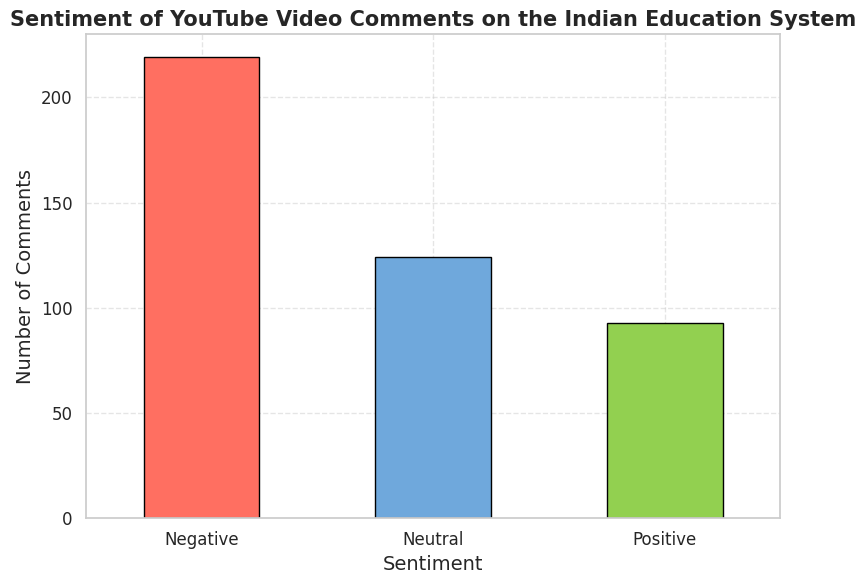

In [241]:
# Sentiment counts
sentiment_counts = comments["sentiment_label"].value_counts()
sentiment_counts.index = sentiment_counts.index.str.capitalize()  # Capitalize labels

# Custom colors
colors = ['#FF6F61', '#6FA8DC', '#92D050']  # Red, Blue, Green

# Bar chart
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind="bar", color=colors, edgecolor='black')

# Title and labels
plt.title("Sentiment of YouTube Video Comments on the Indian Education System", fontsize=15, fontweight="bold")
plt.xlabel("Sentiment", fontsize=14)
plt.ylabel("Number of Comments", fontsize=14)

# Labels
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

# Gridlines
plt.grid(axis='both', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

## **Word Cloud to Understand Pain Points**

In [242]:
!pip install wordcloud

In [243]:
from wordcloud import WordCloud, STOPWORDS

In [244]:
negative_comments = comments[comments["sentiment_label"] == "negative"]
negative_comments

,simpleText,votes,sentiment_label,sentiment_score
0,Things our education system lacks as of now~ 1...,2217,negative,0.788695
1,Everything about our education system is dark☕️,2002,negative,0.916752
5,The reasons mentioned are not only for student...,232,negative,0.742476
6,Indian students lack two things- 1) Equality 2...,212,negative,0.627591
9,The fact that the education system aims only a...,166,negative,0.910540
...,...,...,...,...
282,Most reason for suicides is mainly failures up...,0,negative,0.935284
287,I am in kota ..in 2022 almost 15 students died...,0,negative,0.896387
288,If you have courage then make a video on saddn...,0,negative,0.725510
289,Plz make a video on improvement exam as I want...,0,negative,0.540544


In [245]:
# Combine all negative comments into a single string
negative_comments_all = ' '.join(negative_comments['simpleText'])

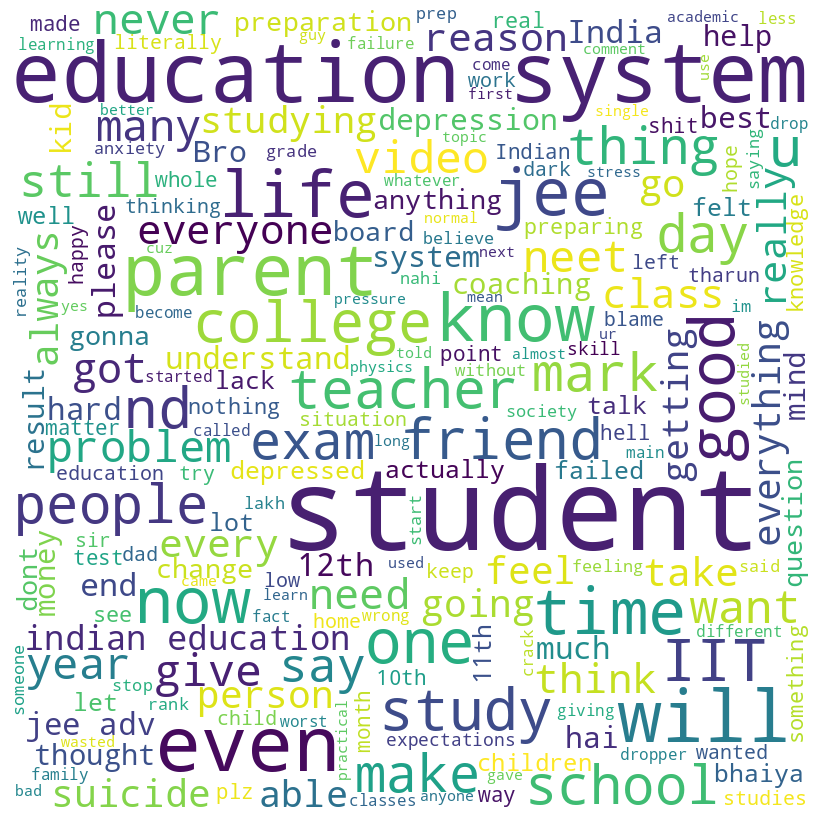

In [246]:
wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=STOPWORDS, random_state=42).generate(negative_comments_all)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

## **Insights:**

*   **Mental health crises** fueled by **academic pressure**.
*   An **exam-focused**, **competitive culture** that neglects holistic development.
*   A **commercialized education system** where coaching plays a central role.
*   A call for **systemic change** to reduce pressure and focus on skills and life preparation.

The word cloud portrays the **highly pressurized**, **exam-focused nature** of the Indian education system, where **parental pressure**, **mental health struggles**, and **high-stakes competitive exams** dominate conversations.

These insights show a collective dissatisfaction with the rigid structure of the Indian education system and a **growing desire for a more balanced, student-friendly approach**.